# Final Project - Dangerous Driving

### Description

In this project, I analyzed nationwide driving fatalies and other bad driving data.

**Datasets**: 
* FARS 2015. Fars is a nationwide census providing NHTSA, Congress and the American public yearly data regarding fatal injuries suffered in motor vehicle traffic crashes.
* Worst Drivers by State

In [1]:
%matplotlib inline  

import pandas as pd
import numpy as np
pd.options.display.max_columns = 55

/Users/benjaminsingleton/anaconda/envs/py3k/lib/python3.5/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
# Dataset accessed from here: ftp://ftp.nhtsa.dot.gov/fars/2015/National/FARS2015NationalCSV.zip
df = pd.read_csv('accident.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32166 entries, 0 to 32165
Data columns (total 52 columns):
STATE         32166 non-null int64
ST_CASE       32166 non-null int64
VE_TOTAL      32166 non-null int64
VE_FORMS      32166 non-null int64
PVH_INVL      32166 non-null int64
PEDS          32166 non-null int64
PERNOTMVIT    32166 non-null int64
PERMVIT       32166 non-null int64
PERSONS       32166 non-null int64
COUNTY        32166 non-null int64
CITY          32166 non-null int64
DAY           32166 non-null int64
MONTH         32166 non-null int64
YEAR          32166 non-null int64
DAY_WEEK      32166 non-null int64
HOUR          32166 non-null int64
MINUTE        32166 non-null int64
NHS           32166 non-null int64
RUR_URB       32166 non-null int64
FUNC_SYS      32166 non-null int64
RD_OWNER      32166 non-null int64
ROUTE         32166 non-null int64
TWAY_ID       32166 non-null object
TWAY_ID2      8400 non-null object
MILEPT        32166 non-null int64
LATITUDE      3

In [4]:
df.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,TWAY_ID,TWAY_ID2,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,0,1,1,2015,5,2,40,0,1,3,1,3,SR-5,NaN,1754,33.878653,-87.325328,0,35,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,0,1,1,2015,5,22,13,1,1,1,1,1,I-65,NaN,3604,34.910442,-86.908708,0,34,0,0,1,1,0,3,2,10,0,10,0,0000000,99,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,0,1,1,2015,5,1,25,0,1,3,1,2,US-SR 6,NaN,1958,32.142006,-85.758456,0,42,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,0,4,1,2015,1,0,57,0,1,4,1,3,SR-27,NaN,566,31.439814,-85.510300,0,53,0,0,1,1,0,4,2,10,0,10,0,0000000,99,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,2050,7,1,2015,4,7,9,0,2,3,1,2,US-SR 53,HINTON WATERS AVE,308,31.319331,-85.515100,0,12,6,0,2,3,0,1,1,1,0,1,0,0000000,99,99,7,16,88,88,0,0,0,1,0


In [5]:
# Convert the columns of Day, Month, Year, Hour, Minute into a single datetime column
# Requirements: Project includes at least one data transformation operation.

datetime = df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE']]
datetime = datetime.rename(columns={'YEAR': 'year', 'MONTH': 'month', 'DAY': 'day', 
                                    'HOUR': 'hour', 'MINUTE': 'minute'})
df['DATETIME'] = pd.to_datetime(datetime)

In [6]:
# Replace STATE column with appropriate state names
state_codes = {1: 'Alabama', 2: 'Alaska', 4: 'Arizona',  5: 'Arkansas', 6: 'California', 
8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida',
13: 'Georgia', 15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana',
19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 22: 'Louisiana', 23: 'Maine',
24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota',  28: 'Mississippi', 
29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire',
34: 'New Jersey', 35: 'New Mexico', 36: 'New York', 37: 'North Carolina', 38: 'North Dakota',
39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 43: 'Puerto Rico',
44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 48: 'Texas',
49: 'Utah', 50: 'Vermont', 51: 'Virginia', 52: 'Virgin Islands', 53: 'Washington',
54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming'}

df['STATE_NAME'] = df['STATE'].replace(state_codes)

In [7]:
# Sum the number of incidents and fatalities in each state
# Requirements: Project includes at least one grouping or aggregation.

print('Top 10 States with most fatal incidents')
print(df.groupby('STATE_NAME')['ST_CASE'].count().nlargest(10))
print()
print('Top 10 States with most number of fatalities')
print(df.groupby('STATE_NAME')['FATALS'].sum().nlargest(10))

Top 10 States with most fatal incidents
STATE_NAME
Texas             3124
California        2925
Florida           2699
Georgia           1327
North Carolina    1275
Pennsylvania      1102
New York          1046
Ohio              1029
Illinois           914
South Carolina     909
Name: ST_CASE, dtype: int64

Top 10 States with most number of fatalities
STATE_NAME
Texas             3516
California        3176
Florida           2939
Georgia           1430
North Carolina    1379
Pennsylvania      1200
New York          1121
Ohio              1110
Illinois           998
South Carolina     977
Name: FATALS, dtype: int64


Mean number of people involved in fatal car crash: 2.29049306721
Median number of people involved in fatal car crash: 2.0
Standard deviation of number of people involved in fatal car crash: 1.94519686736


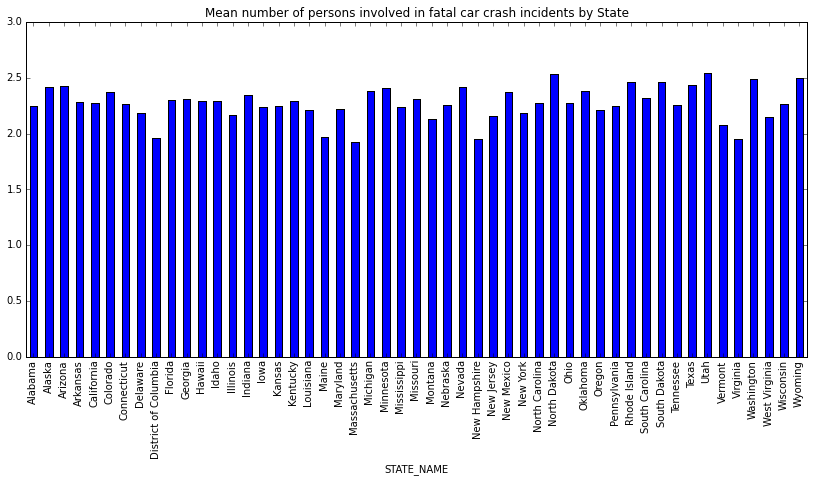

In [8]:
# Statistical analysis of the number of people involved in fatal car crash incident
# Requirements: Project includes at least one statistical analysis and at
#               least one graphics that describes or validates your data.

print('Mean number of people involved in fatal car crash:', df['PERSONS'].mean())
print('Median number of people involved in fatal car crash:', df['PERSONS'].median())
print('Standard deviation of number of people involved in fatal car crash:', df['PERSONS'].std())


df.groupby('STATE_NAME')['PERSONS'].mean().plot(kind='bar', figsize=(14,6), 
                                                title='Mean number of persons involved in fatal car crash incidents by State')

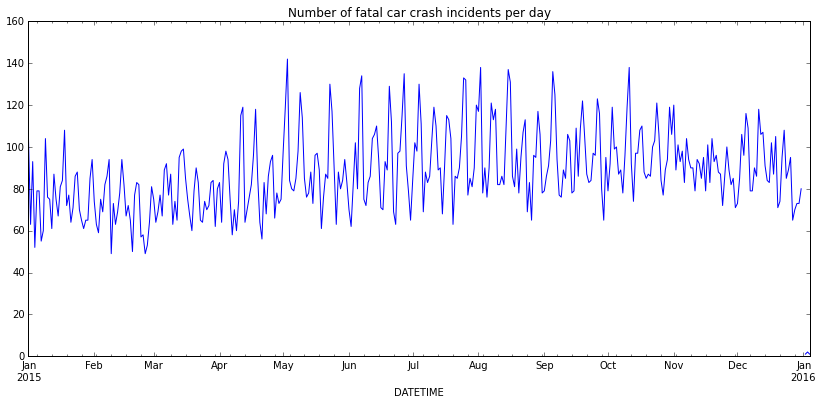

In [9]:
# Visualization of the number of fatal car crash incidents nationwide on a daily basis
df.index = df['DATETIME']

df['incident_count'] = 1

df['incident_count'].resample('1D').sum().plot(figsize=(14,6), title='Number of fatal car crash incidents per day')

In [10]:
# We try to predict the number of fatalities based on the number of persons involved, the hour of day and whether
# the incident was classified as a drunk driving incident. We use a machine learning technique similar to a logistic
# regression, but it actually uses a random forest to make the predictions. Ultimately, we score the algorithm using
# the r-squared metric. In this example, we see that the r-squared is very low so using only the columns we included,
# we can't make very good predictions about the number of people killed in a crash.

# Requirements: Project includes at least one feature that we did not cover in class!

from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score

X = df[['PERSONS', 'HOUR', 'DRUNK_DR']]
y = df['FATALS']

X_train, X_test, y_train, y_test = train_test_split(X, y)

rfclf = RandomForestRegressor(n_estimators=100)

rfclf.fit(X_train, y_train)

y_pred = rfclf.predict(X_test)

r2_score(y_test, y_pred)

0.029699541446331135

In [11]:
# Let's start to analyze the second dataset
df2 = pd.read_excel('Copy of Worst Drivers By State 2015.xlsx')

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
State                                                                      51 non-null object
Fatalities Rate per 100 Million Vehicle Miles Traveled                     51 non-null int64
Failure to Obey (Traffic Signals, Seat Belts, & Invalid Driver License)    51 non-null int64
Drunk Driving                                                              51 non-null int64
Speeding                                                                   51 non-null int64
Careless Driving                                                           51 non-null int64
Total Score                                                                51 non-null int64
Rank                                                                       51 non-null int64
dtypes: int64(7), object(1)
memory usage: 3.3+ KB


In [13]:
df2.head()

,State,Fatalities Rate per 100 Million Vehicle Miles Traveled,"Failure to Obey (Traffic Signals, Seat Belts, & Invalid Driver License)",Drunk Driving,Speeding,Careless Driving,Total Score,Rank
0,Alabama,15,14,18,29,26,102,12
1,Alaska,26,44,46,5,42,163,40
2,Arizona,10,7,47,17,3,84,6
3,Arkansas,8,8,31,50,19,116,20
4,California,40,15,33,23,9,120,22


In [14]:
# We see the ten lowest ranked states for the number of fatalities per 100 million vehicle miles traveled.
# What is interesting is that if we look back to our earlier analysis of the states with the most fatal incidents,
# it is pretty different from the results from the new dataset. Why is this the case? Well, in the new dataset,
# the ranking is based on fatalities **per 100 million vehicle miles traveled**. This unit of measurement clearly
# affects the results.

print (df2.sort_values('Fatalities Rate per 100 Million Vehicle Miles Traveled', 
                ascending=False)[['State']].head(10))
print()
print()
print('Top 10 States with most fatal incidents')
print(df.groupby('STATE_NAME')['ST_CASE'].count().nlargest(10))

                   State
8   District of Columbia
21         Massachusetts
23             Minnesota
30            New Jersey
47            Washington
44                  Utah
20              Maryland
39          Rhode Island
35                  Ohio
6            Connecticut


Top 10 States with most fatal incidents
STATE_NAME
Texas             3124
California        2925
Florida           2699
Georgia           1327
North Carolina    1275
Pennsylvania      1102
New York          1046
Ohio              1029
Illinois           914
South Carolina     909
Name: ST_CASE, dtype: int64
